Text(0.5,1,'Total Energy')

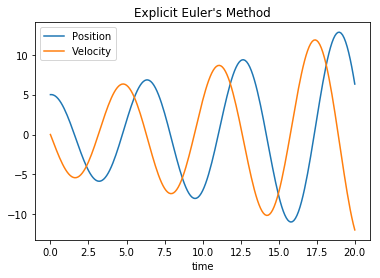

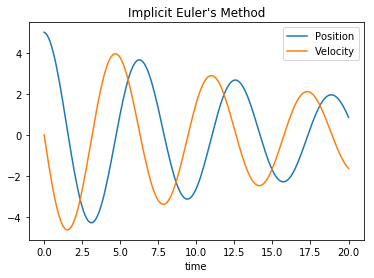

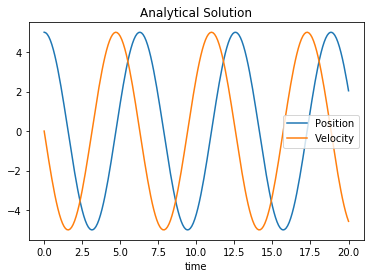

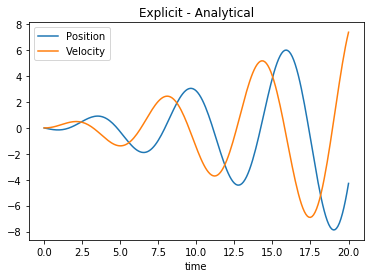

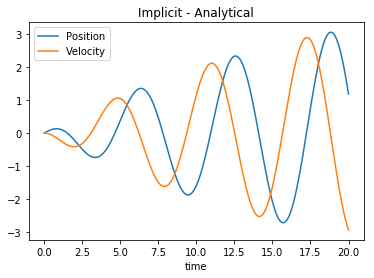

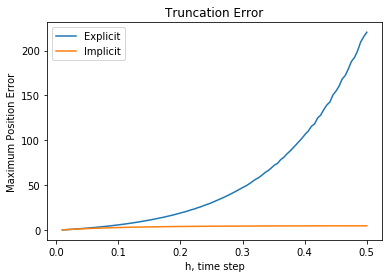

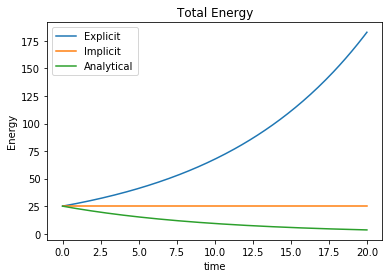

In [22]:
## Alyssa Poletti
## Ph 20 Lab 3
## February 8th, 2019

## Libaries ##

import numpy as np
import matplotlib.pyplot as plt

### Problem 1 ###

## Functions ##

def euler_spring(h_step, n_steps, x_0, v_0):
    
    # t_i = t_0 + i * h_step, h_step is the step value
    # n_steps is the number of steps
    # x_0 = x(t_0), v_0 = v(t_0) where t_0 = 0
    # i.e. initial values
    
    t_0 = 0
    
    t_values = []
    x_values = []
    v_values = []
    
    # boundary conditions
    
    t_values.append(t_0)
    x_values.append(x_0)
    v_values.append(v_0)
    
    for i in range(n_steps):
        x_i = x_values[i]
        v_i = v_values[i]
        
        t_next = t_0 + (i + 1) * h_step
        x_next = x_i + v_i * h_step
        v_next = v_i - x_i * h_step
        
        x_values.append(x_next)
        v_values.append(v_next)
        t_values.append(t_next)
        
    return t_values, x_values, v_values

def impli_spring(h_step, n_steps, x_0, v_0):
    
    # t_i = t_0 + i * h_step, h_step is the step value
    # n_steps is the number of steps
    # x_0 = x(t_0), v_0 = v(t_0) where t_0 = 0
    # i.e. initial values
    
    t_0 = 0
    
    t_values = []
    x_values = []
    v_values = []
    
    # boundary conditions
    
    t_values.append(t_0)
    x_values.append(x_0)
    v_values.append(v_0)
    denom = 1 + h_step ** 2
    for i in range(n_steps):
        x_i = x_values[i]
        v_i = v_values[i]
        
        t_next = t_0 + (i + 1) * h_step
        x_next = (x_i + v_i * h_step) / denom
        v_next = (v_i - x_i * h_step) / denom
        
        x_values.append(x_next)
        v_values.append(v_next)
        t_values.append(t_next)
        
    return t_values, x_values, v_values

def analytical_spring(h_step, n_steps, x_0):
    # t_i = t_0 + i * h_step, h_step is the step value
    # n_steps is the number of steps
    # x_0 = x(t_0), v_0 = v(t_0) where t_0 = 0
    # i.e. initial values
    
    t_0 = 0   
    t_values = []
    
    # boundary conditions
    
    t_values.append(t_0)
    
    for i in range(n_steps):
        t_next = t_0 + (i + 1) * h_step
        t_values.append(t_next)    
    
    x_values = x_0 * np.cos(np.array(t_values))
    v_values = -1 * x_0 * np.sin(np.array(t_values))
    return t_values, x_values, v_values

def find_trunc_err(func, h_values, t_final, x_0, v_0):
    # list of h_step values
    x_error = []
    
    for h_step in h_values:
        n_steps = int(t_final / h_step)
        t_values_1, x_values_1, v_values_1 = func(h_step, n_steps, x_0, v_0)
        t_values_2, x_values_2, v_values_2 = analytical_spring(h_step, n_steps, x_0)
        max_x_error = max(np.array(x_values_2) - np.array(x_values_1))
        x_error.append(max_x_error)
        
    return x_error

def total_energy(x_values, v_values):
    e_values = []
    for i in range(len(x_values)):
        x = x_values[i]
        v = v_values[i]
        e_values.append(x**2 + v **2)
    return e_values

## Calculations ##

t_values_1, x_values_1, v_values_1 = euler_spring(0.1, 200, 5.0, 0.0)
t_values_2, x_values_2, v_values_2 = analytical_spring(0.1, 200, 5.0)
t_values_3, x_values_3, v_values_3 = impli_spring(0.1, 200, 5.0, 0.0)

x_error_1 = np.array(x_values_2) - np.array(x_values_1)
v_error_1 = np.array(v_values_2) - np.array(v_values_1)
x_error_2 = np.array(x_values_2) - np.array(x_values_3)
v_error_2 = np.array(v_values_2) - np.array(v_values_3)

h_values = np.linspace(0.01, 0.5, 100)
max_x_error_ex = find_trunc_err(euler_spring, h_values, 20, 5.0, 0.0)
max_x_error_im = find_trunc_err(impli_spring, h_values, 20, 5.0, 0.0)

e_values_1 = total_energy(x_values_1, v_values_1)
e_values_2 = total_energy(x_values_2, v_values_2)
e_values_3 = total_energy(x_values_3, v_values_3)

## Plots ##

plt.figure(1)
plt.plot(t_values_1, x_values_1, t_values_1, v_values_1)
plt.legend(['Position', 'Velocity'])
plt.xlabel('time')
plt.title("Explicit Euler's Method")
      
plt.figure(2)
plt.plot(t_values_3, x_values_3, t_values_3, v_values_3)
plt.legend(['Position', 'Velocity'])
plt.xlabel('time')
plt.title("Implicit Euler's Method")

plt.figure(3)
plt.plot(t_values_2, x_values_2, t_values_2, v_values_2)
plt.legend(['Position', 'Velocity'])
plt.xlabel('time')
plt.title('Analytical Solution')

plt.figure(4)
plt.plot(t_values_1, x_error_1, t_values_1, v_error_1)
plt.legend(['Position', 'Velocity'])
plt.xlabel('time')
plt.title('Explicit - Analytical')

plt.figure(5)
plt.plot(t_values_1, x_error_2, t_values_1, v_error_2)
plt.legend(['Position', 'Velocity'])
plt.xlabel('time')
plt.title('Implicit - Analytical')

plt.figure(6)
plt.plot(h_values, max_x_error_ex, h_values, max_x_error_im)
plt.xlabel('h, time step')
plt.ylabel('Maximum Position Error')
plt.legend(['Explicit', 'Implicit'])
plt.title('Truncation Error')

plt.figure(7)
plt.plot(t_values_1, e_values_1, t_values_1, e_values_2, t_values_1, e_values_3)
plt.xlabel('time')
plt.ylabel('Energy')
plt.legend(['Explicit', 'Implicit', 'Analytical'])
plt.title('Total Energy')


Text(0.5,1,'Total Energy')

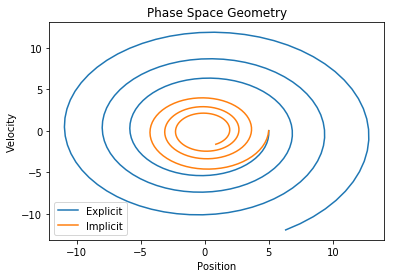

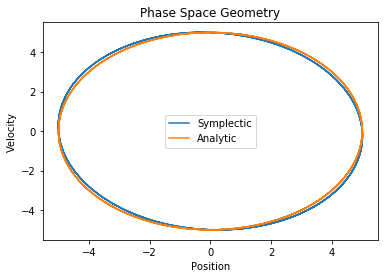

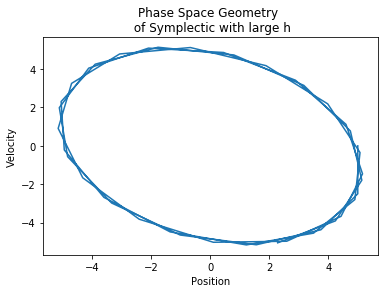

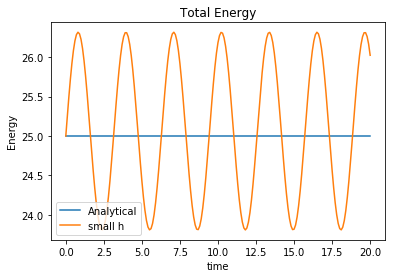

In [26]:
### Problem 2 ###

## Functions ##

def sympl_spring(h_step, n_steps, x_0, v_0):
    
    # t_i = t_0 + i * h_step, h_step is the step value
    # n_steps is the number of steps
    # x_0 = x(t_0), v_0 = v(t_0) where t_0 = 0
    # i.e. initial values
    
    t_0 = 0
    
    t_values = []
    x_values = []
    v_values = []
    
    # boundary conditions
    
    t_values.append(t_0)
    x_values.append(x_0)
    v_values.append(v_0)
    
    for i in range(n_steps):
        x_i = x_values[i]
        v_i = v_values[i]
        
        t_next = t_0 + (i + 1) * h_step
        x_next = x_i + v_i * h_step
        v_next = v_i - x_next * h_step
        
        x_values.append(x_next)
        v_values.append(v_next)
        t_values.append(t_next)
        
    return t_values, x_values, v_values

## Calculations ##

t_values_4, x_values_4, v_values_4 = sympl_spring(0.1, 200, 5.0, 0.0) # small h
t_values_5, x_values_5, v_values_5 = sympl_spring(0.5, 40, 5.0, 0.0)  # large h

e_values_4 = total_energy(x_values_4, v_values_4)
e_values_5 = total_energy(x_values_5, v_values_5)

## Plots ##

plt.figure(8)
plt.plot(x_values_1, v_values_1, x_values_3, v_values_3)
plt.title('Phase Space Geometry')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend(['Explicit', 'Implicit'])

plt.figure(9)
plt.plot(x_values_4, v_values_4, x_values_2, v_values_2)
plt.title('Phase Space Geometry')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend(['Symplectic', 'Analytic'])

plt.figure(10)
plt.plot(x_values_5, v_values_5)
plt.title('Phase Space Geometry \n of Symplectic with large h')
plt.xlabel('Position')
plt.ylabel('Velocity')

plt.figure(11)
plt.plot(t_values_2, e_values_2, t_values_4, e_values_4)
plt.xlabel('time')
plt.ylabel('Energy')
plt.legend(['Analytical', 'small h', 'large h'])
plt.title('Total Energy')
